# <center><font size=6>实训3
# 训练目标：掌握数据标准化的原理与方法
# 需求说明：算法的种类非常多，一旦涉及空间距离计算，梯度下降等，就必须进行标准化处理。对线路特征，线路用电量趋势下降特征，
# 线路告警特征进行标准化处理。
# 实现思路和步骤：读取model.csv表，定义标准差标准化函数，使用函数分别对3列数据进行标准化，查看标准化后的数据

In [2]:
import pandas as pd
#pd.rcParams['font.sans-serif'] = 'SimHei'
#pd.rcParams['axes.unicode_minus'] = False
data2=pd.read_csv('D:/Desktop/model.csv',encoding='gbk')
#print(data2)
def MinMaxScale(dat):
    dat=(dat-dat.min())/(dat.max()-dat.min())
    return dat
dat1 = MinMaxScale(data2['电量趋势下降指标'])
dat2 = MinMaxScale(data2['线损指标'])
dat3 = MinMaxScale(data2['告警类指标'])
dat4 = MinMaxScale(data2['是否窃漏电'])
dat5 = pd.concat([dat1,dat2,dat3,dat4],axis=1)
# print(data2[['线损指标','告警类指标','是否窃漏电']].head())
# print(data2.head())
dat5

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,0.4,1.0,0.25,1.0
1,0.4,0.0,1.00,1.0
2,0.2,1.0,0.25,1.0
3,0.9,0.0,0.00,0.0
4,0.3,1.0,0.00,0.0
5,0.2,0.0,0.00,0.0
6,0.5,0.0,0.50,1.0
7,0.3,1.0,0.75,1.0
8,0.3,0.0,0.00,0.0
9,0.4,1.0,0.00,0.0


In [3]:
import numpy as np
print(dat5.agg({'电量趋势下降指标':[np.mean,np.std,np.var,np.median],'线损指标':[np.mean,np.std,np.var,np.median],
                '告警类指标':[np.mean,np.std,np.var,np.median],'是否窃漏电':[np.mean,np.std,np.var,np.median]}))
#使用聚合agg分析离差化标准化处理后的数据
print(dat5['电量趋势下降指标'].value_counts())
print(dat5['线损指标'].value_counts())
print(dat5['告警类指标'].value_counts())
print(dat5['是否窃漏电'].value_counts())
#根据平均数和线损指标与是否窃漏电指标的属性可知，线损频率远远大于窃漏电频率，线损频率高于二分之一，告警频率大于三分之二，但是级别高的报警频率较低
#电量下降趋势指标分布均匀，且较低值分布多
#这说明了偷漏电情况较少，线损情况过多，建议及时维修当地老化电路

        电量趋势下降指标      线损指标     告警类指标     是否窃漏电
mean    0.271821  0.512027  0.292955  0.137457
std     0.209177  0.500716  0.266446  0.344922
var     0.043755  0.250717  0.070993  0.118971
median  0.300000  1.000000  0.250000  0.000000
0.4    50
0.0    50
0.2    48
0.3    47
0.1    44
0.5    31
0.6     8
0.7     5
0.9     4
0.8     2
1.0     2
Name: 电量趋势下降指标, dtype: int64
1.0    149
0.0    142
Name: 线损指标, dtype: int64
0.00    100
0.50     95
0.25     74
0.75     11
1.00     11
Name: 告警类指标, dtype: int64
0.0    251
1.0     40
Name: 是否窃漏电, dtype: int64


In [4]:
#标准化标准化数据
def StandardScaler(data):
    data = (data-data.mean())/data.std()
    return data
dat6 = StandardScaler(data2['电量趋势下降指标'])
dat7 = StandardScaler(data2['线损指标'])
dat8 = StandardScaler(data2['告警类指标'])
dat9 = StandardScaler(data2['是否窃漏电'])
dat10 = pd.concat([dat6,dat7,dat8,dat9],axis=1)
dat10

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,0.612777,0.974549,-0.161216,2.500687
1,0.612777,-1.022590,2.653616,2.500687
2,-0.343352,0.974549,-0.161216,2.500687
3,3.003099,-1.022590,-1.099494,-0.398516
4,0.134712,0.974549,-1.099494,-0.398516
5,-0.343352,-1.022590,-1.099494,-0.398516
6,1.090841,-1.022590,0.777061,2.500687
7,0.134712,0.974549,1.715339,2.500687
8,0.134712,-1.022590,-1.099494,-0.398516
9,0.612777,0.974549,-1.099494,-0.398516


In [5]:
print(dat10.agg({'电量趋势下降指标':[np.mean,np.std,np.var,np.median],'线损指标':[np.mean,np.std,np.var,np.median],
                '告警类指标':[np.mean,np.std,np.var,np.median],'是否窃漏电':[np.mean,np.std,np.var,np.median]}))
#使用聚合agg分析标准化标准化处理后的数据
print(dat10['电量趋势下降指标'].value_counts())
print(dat10['线损指标'].value_counts())
print(dat10['告警类指标'].value_counts())
print(dat10['是否窃漏电'].value_counts())

            电量趋势下降指标          线损指标         告警类指标         是否窃漏电
mean   -7.325183e-17  7.401487e-17 -7.935615e-17  4.189089e-16
std     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
var     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
median  1.347123e-01  9.745487e-01 -1.612161e-01 -3.985159e-01
 0.612777    50
-1.299481    50
-0.343352    48
 0.134712    47
-0.821417    44
 1.090841    31
 1.568906     8
 2.046970     5
 3.003099     4
 2.525034     2
 3.481163     2
Name: 电量趋势下降指标, dtype: int64
 0.974549    149
-1.022590    142
Name: 线损指标, dtype: int64
-1.099494    100
 0.777061     95
-0.161216     74
 1.715339     11
 2.653616     11
Name: 告警类指标, dtype: int64
-0.398516    251
 2.500687     40
Name: 是否窃漏电, dtype: int64


In [6]:
import numpy as np
#自定义小数定标标准化函数
def DecimalScaler(data):
    data = data/10**np.ceil(np.log10(data.abs().max()))
    return data
dat11 = DecimalScaler(data2['电量趋势下降指标'])
dat12 = DecimalScaler(data2['线损指标'])
dat13 = DecimalScaler(data2['告警类指标'])
dat14 = DecimalScaler(data2['是否窃漏电'])
dat15 = pd.concat([dat11,dat12,dat13,dat14],axis=1)
dat15

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,0.4,1.0,0.1,1.0
1,0.4,0.0,0.4,1.0
2,0.2,1.0,0.1,1.0
3,0.9,0.0,0.0,0.0
4,0.3,1.0,0.0,0.0
5,0.2,0.0,0.0,0.0
6,0.5,0.0,0.2,1.0
7,0.3,1.0,0.3,1.0
8,0.3,0.0,0.0,0.0
9,0.4,1.0,0.0,0.0


In [7]:
print(dat15.agg({'电量趋势下降指标':[np.mean,np.std,np.var,np.median],'线损指标':[np.mean,np.std,np.var,np.median],
                '告警类指标':[np.mean,np.std,np.var,np.median],'是否窃漏电':[np.mean,np.std,np.var,np.median]}))
#使用聚合agg分析离差化标准化处理后的数据
print(dat15['电量趋势下降指标'].value_counts())
print(dat15['线损指标'].value_counts())
print(dat15['告警类指标'].value_counts())
print(dat15['是否窃漏电'].value_counts())

        电量趋势下降指标      线损指标     告警类指标     是否窃漏电
mean    0.271821  0.512027  0.117182  0.137457
std     0.209177  0.500716  0.106578  0.344922
var     0.043755  0.250717  0.011359  0.118971
median  0.300000  1.000000  0.100000  0.000000
0.4    50
0.0    50
0.2    48
0.3    47
0.1    44
0.5    31
0.6     8
0.7     5
0.9     4
0.8     2
1.0     2
Name: 电量趋势下降指标, dtype: int64
1.0    149
0.0    142
Name: 线损指标, dtype: int64
0.0    100
0.2     95
0.1     74
0.4     11
0.3     11
Name: 告警类指标, dtype: int64
0.0    251
1.0     40
Name: 是否窃漏电, dtype: int64


In [8]:
#等宽离散化
aa=pd.cut(data2['线损指标'],5)
print(aa.value_counts())

(0.8, 1.0]       149
(-0.001, 0.2]    142
(0.6, 0.8]         0
(0.4, 0.6]         0
(0.2, 0.4]         0
Name: 线损指标, dtype: int64


In [9]:
#等频离散化
def SameRateCut(data,k):
    w=data.quantile(np.arange(0,0.1+1.0/k,1.0/k))
    data=pd.cut(data,w)
    return data
result=SameRateCut(data2['是否窃漏电'],5).value_counts()
print(result)

(0.0, 0.0]    0
Name: 是否窃漏电, dtype: int64


In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
p=plt.figure(figsize=(50,7))
plt.plot(data2)
plt.grid(True) ##增加格点
plt.axis('tight') # 坐标轴适应数据量 axis 设置坐标轴
plt.xlabel('时间（天）')
plt.ylabel('相应数据')
plt.title("data2日图")
plt.show()
#假设data2是根据时间序列排列，单位为天
#显然蓝线是电量下降趋势指标，绿线是告警类指标，红线是是否窃漏电指标，橙线是线损指标
#电量下降指标也偶尔会有峰值，前期告警电量下降线损窃漏电频繁，中后期趋于均匀

<Figure size 5000x700 with 1 Axes>

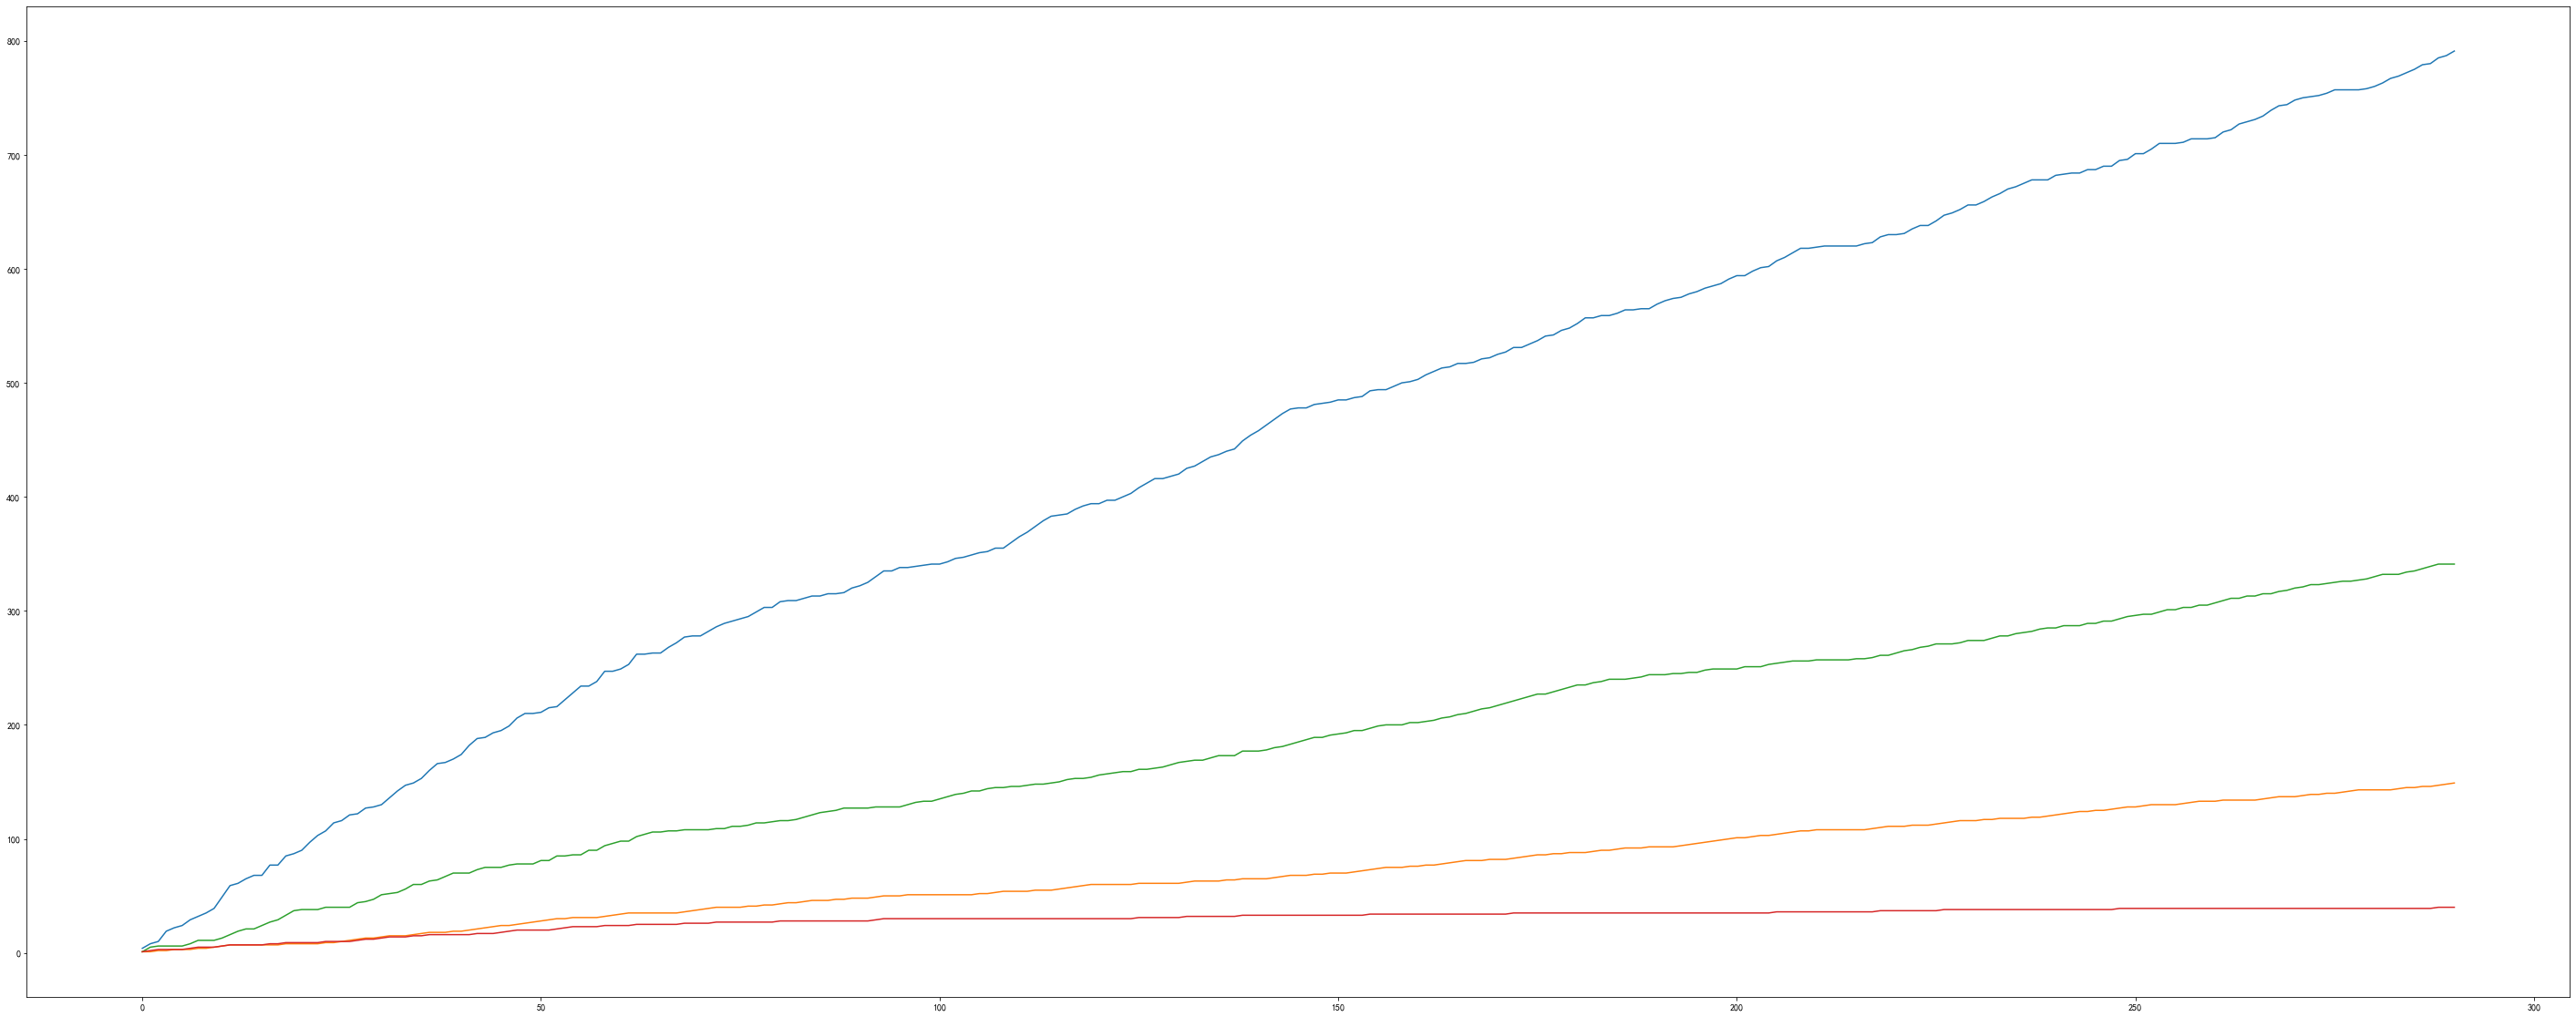

In [11]:
p=plt.figure(figsize=(50,20))
plt.plot(data2.cumsum())
#显然蓝线是电量下降趋势指标，绿线是告警类指标，红线是是否窃漏电指标，橙线是线损指标
#从折线图看，四个指标分布整体上较为均匀，但是集中于前期，电量下降趋势指标波动较大

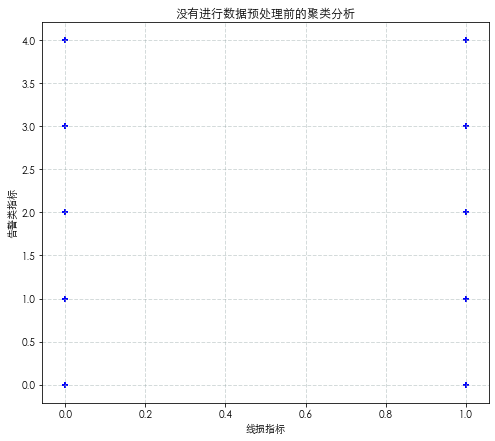

In [12]:
#没有进行数据预处理前的聚类分析
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
p=plt.figure(figsize=(8,7))
plt.rc('font', family='STXihei', size=10)
plt.scatter(data2['线损指标'],data2['告警类指标'],color='blue',marker='+',linewidth=2,alpha=0.8)
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
plt.axis('tight') # 坐标轴适应数据量 axis 设置坐标轴
plt.xlabel('线损指标')
plt.ylabel('告警类指标')
plt.title("没有进行数据预处理前的聚类分析")
plt.show()

In [13]:
data2.dropna(axis=0,how='any',inplace=True)
#聚类分析法
def KmeanCut(data,k):
    from sklearn.cluster import KMeans
    kmodel=KMeans(n_clusters=k)
    kmodel.fit(data.values.reshape((len(data),1)))
    c=pd.DataFrame(kmodel.cluster_centers_).sort_values(0)
    w=c.rolling(2).mean().iloc[1:]
    w=[0]+list(w[0])+[data.max()]
    data=pd.cut(data,w)
    return data
result1=KmeanCut(data2['电量趋势下降指标'],5).value_counts()
print(result1)
result3=KmeanCut(data2['告警类指标'],5).value_counts()
print(result3)

(1.481, 3.247]    95
(3.247, 4.603]    50
(0.0, 1.481]      44
(4.603, 6.718]    39
(6.718, 10.0]     13
Name: 电量趋势下降指标, dtype: int64
(1.5, 2.5]    95
(0.5, 1.5]    74
(3.5, 4.0]    11
(2.5, 3.5]    11
(0.0, 0.5]     0
Name: 告警类指标, dtype: int64


# <center><font size=6>三.数据分析
# <font size=4>3.1.1
B,C的用电量有波动，A几乎不变
而且2个用户变化有一定周期性，每6个月一次波动，应该是有一定季节性
# <font size=4>3.1.2
用户用电量均成类线性增长，且用户C增长最快，量最大，B次之，A最次
B的用电量有波动，其他变化不大
# <font size=4>3.2.1
用户21261001一直在进行偷漏电行为，而且集中于9月，警告原因多为电流过负荷和电流不平衡，用电量为800到900之间，线损为0.16左右
用电量变化具有一定波动性，但是趋势为逐渐递减
原因可能是偷漏电行为或者是这几个用户用电量本身的降低
# <font size=4>3.2.2
线损率逐年递增，且也有一定周期性，可能随着季节变化波动
线损原因可能是线路老化，人为破化等等
# <font size=4>3.2.3
漏电原因具有一定规律性，而且有3种原因发生次数为3次，其他两种分别为2次和4次。基本上原因的时间分布较为均匀，但是有些原因分布比较集中
# <font size=4>3.2.4
ID为21261001是偷漏电大户，其他用户基本上只是偶尔偷电
2010/9/17，2010/9/16是有2次偷电行为，其他都是一天一次，
集中于2010年,月份集中于7（线损），9，10，11月（偷漏电告警）
集中于15（线损）,8号和10到20号（偷漏电告警）
# <font size=4>3.3.1
根据平均数和线损指标与是否窃漏电指标的属性可知，线损频率远远大于窃漏电频率，线损频率高于二分之一，告警频率大于三分之二，但是级别高的报警频率较低
电量下降趋势指标分布均匀，且较低值分布多
这说明了偷漏电情况较少，线损情况过多，建议及时维修当地老化电路
# <font size=4>3.3.2
从折线图看，四个指标分布整体上较为均匀，但是集中于前期，电量下降趋势指标波动较大
电量下降指标也偶尔会有峰值，前期告警电量下降线损窃漏电频繁，中后期趋于均匀

# <center>四.综述

综合本文从3个用户的用电量，线路线损数据，线路用电量下降趋势数据，线路告警数据，是否窃漏电数据等数据以及从时间，用户，线损，用电量下降趋势，线路告警，是否窃漏电等角度对数据的分析，了解到用电情况，线损情况，偷漏电情况。线损频率远远大于窃漏电频率，线损频率高于二分之一，告警频率大于三分之二，但是级别高的报警频率较低 电量下降趋势指标分布均匀，且较低值分布多 这说明了偷漏电情况较少，线损情况过多，建议及时维修当地老化电路。而某些用户则一直在偷电，而且时间集中度很高，警告原因多为电流过负荷和电流不平衡，偷电量较为稳定。用户用电具有一定周期性。而线损和偷漏电告警在时间和用户分布有不同的集中度